<a href="https://colab.research.google.com/github/Sagar0120/imblearn_oversampling/blob/main/Credit_Card_Fraud_Imbalance_dataset_using_OverSampling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [54]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [55]:
columns  = [c for c in data.columns if c not in ["Class"]]

In [56]:
target = "Class"

In [57]:
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(116942, 30)
(116942,)


In [58]:
data.isnull().values.any()

True

In [59]:
nan_idx = np.isnan(Y)

In [60]:
X_clean = X[~nan_idx]
y_clean = Y[~nan_idx]

X = X_clean
Y = y_clean

Text(0, 0.5, 'Frequency')

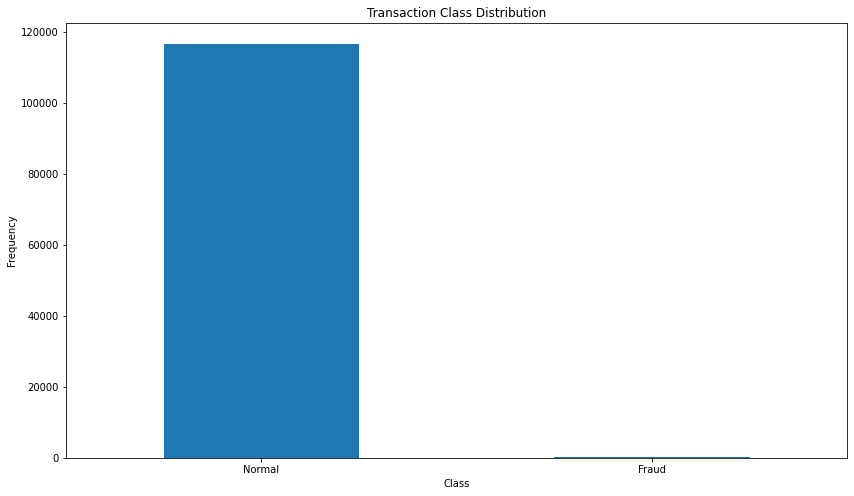

In [61]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [62]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

In [63]:
fraud.shape

(244, 31)

In [64]:
normal.shape

(116697, 31)

In [65]:
from imblearn.combine import SMOTETomek

In [66]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
#os =  RandomOverSampler(0.5)

In [68]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, Y)

In [69]:
X_res.shape, y_res.shape

((233394, 30), (233394,))